## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Possible questions

Does area income effect price of houses

Does grade have an effect on housing price

Does property size effect housing price

Does Age of property effect price

In [1]:
#find lat and long of city center then subtract out lat and long form it to find the difference 
# weak correlation to test in model Floor waterfront view and grade 

In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from datetime import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn import metrics
from scipy import stats
import math
from PIL import Image
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson


In [3]:
df = pd.read_csv("data/kc_house_data_no_miss_values.csv")
df =df.drop(["Unnamed: 0"], axis = 1)

In [4]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,4,0,8,...,66,47.5112,-122.257,1340,5650,113555.0,67,2014,3,0
1,205425.0,2,1.00,880,6780,1.0,0,4,2,7,...,66,47.5009,-122.248,1190,6780,113555.0,77,2014,1,0
2,445000.0,3,2.25,2100,8201,1.0,0,0,0,9,...,66,47.5091,-122.244,2660,8712,113555.0,55,2014,2,0
3,236000.0,3,1.00,1300,5898,1.0,0,4,0,8,...,66,47.5053,-122.255,1320,7619,113555.0,61,2014,2,0
4,170000.0,2,1.00,860,5265,1.0,0,4,0,7,...,66,47.5048,-122.272,1650,8775,113555.0,91,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,2720000.0,4,3.25,3990,18115,2.0,0,4,2,1,...,24,47.6177,-122.229,3450,16087,7190.0,33,2014,3,0
21416,1950000.0,4,3.50,4065,18713,2.0,0,4,2,0,...,24,47.6209,-122.237,3070,18713,7190.0,35,2014,2,0
21417,2250000.0,5,5.25,3410,8118,2.0,0,4,0,1,...,24,47.6295,-122.236,3410,16236,7190.0,16,2015,1,0
21418,2900000.0,5,4.00,5190,14600,2.0,0,2,0,1,...,24,47.6102,-122.225,3840,19250,7190.0,9,2014,3,0


Initial Model

Possibly drop

br : sqft liv

sqft liv 15 : sqft liv

sqft above : sqft liv

sqft lot 15 : sqft lot



Keep sqft_living, drop sqft_above, sqft_living15 due to high collinearity 

Keep sqft_lot drop sqft_lot15

df = df.drop(["sqft_above", "sqft_living15", "sqft_lot15", "lat", "long" ], axis=1)

Although the above table shows that there is a high collinearity between bedrooms and sqft_living, we believe that the number of bedrooms will play a key role in the price of the home, will revisit after modeling to verify if we need

In [5]:
X = df.drop("price", axis=1)
y= df["price"]

## Normalizing Our Data

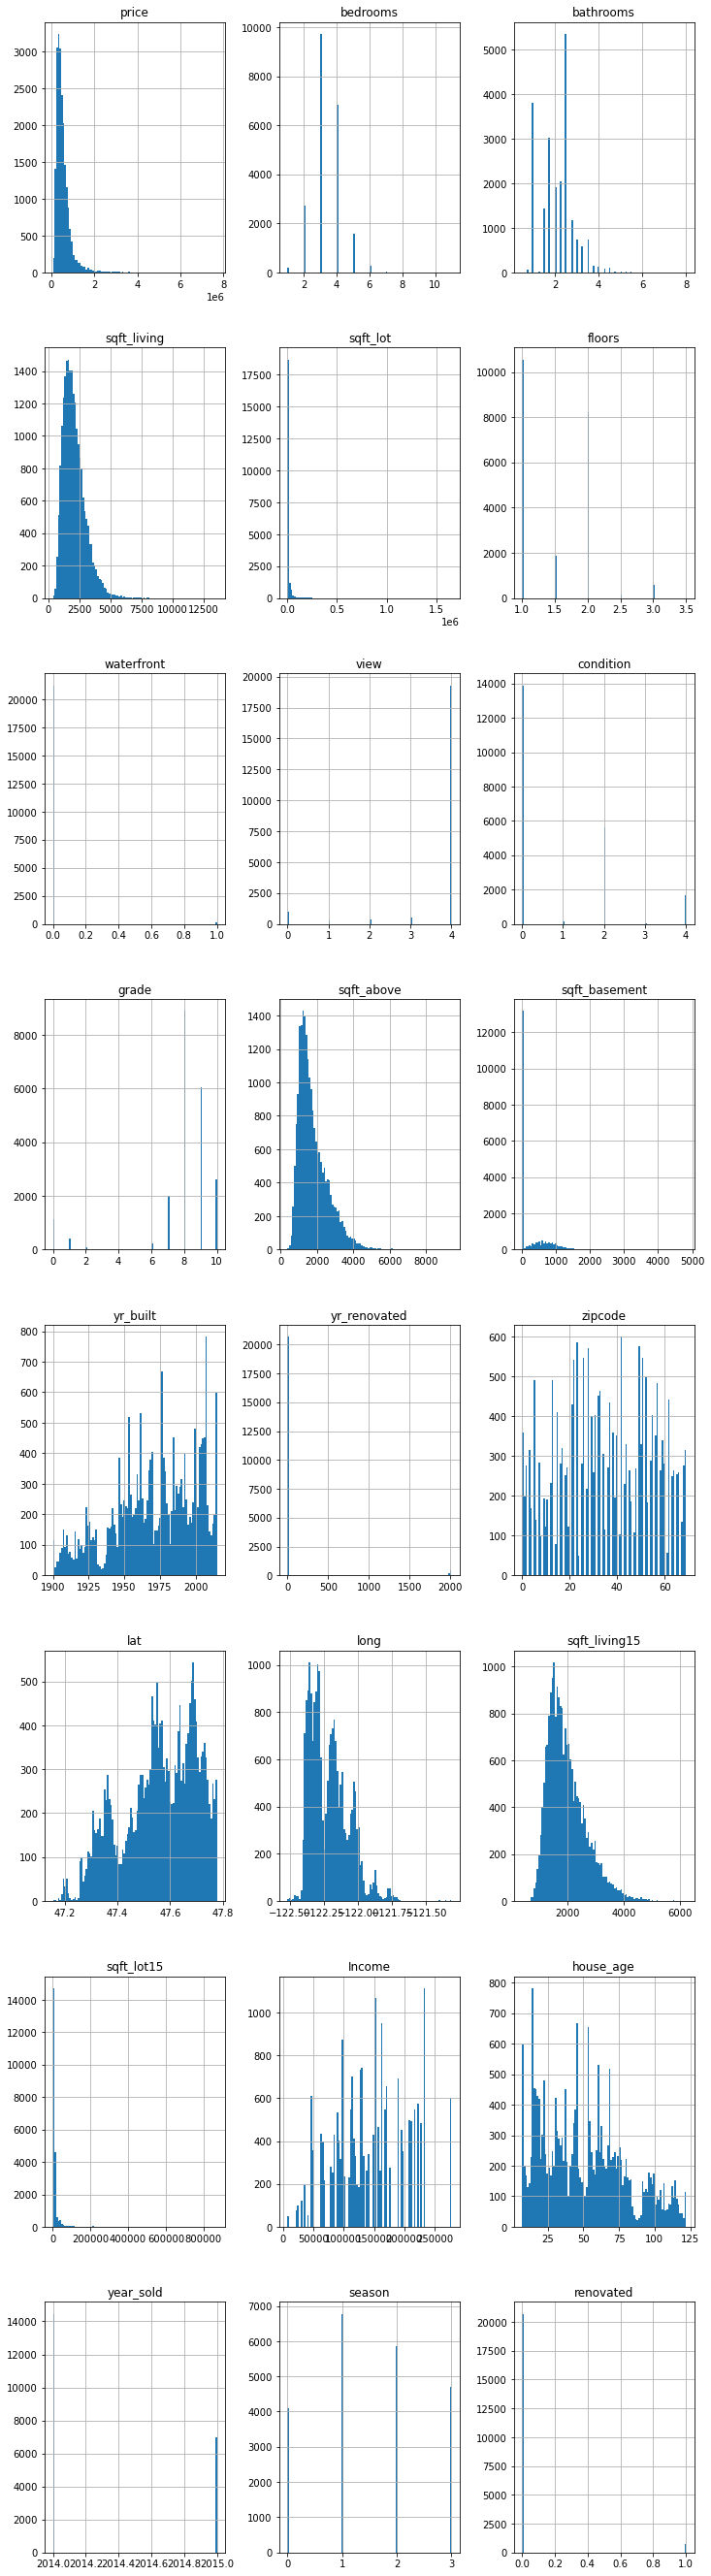

In [6]:
fig, axes = plt.subplots(len(df.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df.hist(column = df.columns[i], bins = 100, ax=axis)
        i = i+1

In [7]:
df = df.apply(lambda x: np.log(x), axis='rows')
df

/Users/valeriaviscarra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/valeriaviscarra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,Income,house_age,year_sold,season,renovated
0,12.309982,1.098612,0.000000,7.073270,8.639411,0.000000,-inf,1.386294,-inf,2.079442,...,4.189655,3.860965,NaN,7.200425,8.639411,11.640043,4.204693,7.607878,1.098612,-inf
1,12.232836,0.693147,0.000000,6.779922,8.821732,0.000000,-inf,1.386294,0.693147,1.945910,...,4.189655,3.860749,NaN,7.081709,8.821732,11.640043,4.343805,7.607878,0.000000,-inf
2,13.005830,1.098612,0.810930,7.649693,9.012011,0.000000,-inf,-inf,-inf,2.197225,...,4.189655,3.860921,NaN,7.886081,9.072457,11.640043,4.007333,7.607878,0.693147,-inf
3,12.371587,1.098612,0.000000,7.170120,8.682369,0.000000,-inf,1.386294,-inf,2.079442,...,4.189655,3.860841,NaN,7.185387,8.938400,11.640043,4.110874,7.607878,0.693147,-inf
4,12.043554,0.693147,0.000000,6.756932,8.568836,0.000000,-inf,1.386294,-inf,1.945910,...,4.189655,3.860831,NaN,7.408531,9.079662,11.640043,4.510860,7.608374,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,14.816142,1.386294,1.178655,8.291547,9.804496,0.693147,-inf,1.386294,0.693147,0.000000,...,3.178054,3.863205,NaN,8.146130,9.685767,8.880446,3.496508,7.607878,1.098612,-inf
21416,14.483340,1.386294,1.252763,8.310169,9.836974,0.693147,-inf,1.386294,0.693147,-inf,...,3.178054,3.863272,NaN,8.029433,9.836974,8.880446,3.555348,7.607878,0.693147,-inf
21417,14.626441,1.609438,1.658228,8.134468,9.001839,0.693147,-inf,1.386294,-inf,0.000000,...,3.178054,3.863452,NaN,8.134468,9.694986,8.880446,2.772589,7.608374,0.000000,-inf
21418,14.880221,1.609438,1.386294,8.554489,9.588777,0.693147,-inf,0.693147,-inf,0.000000,...,3.178054,3.863047,NaN,8.253228,9.865266,8.880446,2.197225,7.607878,1.098612,-inf


In [ ]:
# df_log = pd.DataFrame()
# df_log['price'] = df['price'].map(lambda x: np.log(x))
# df_log['bedrooms'] = df['bedrooms'].map(lambda x: np.log(x))
# df_log['bathrooms'] = df['bathrooms'].map(lambda x: np.log(x+1))
# df_log['sqft_living'] = df['sqft_living'].map(lambda x: np.log(x))
# df_log['sqft_lot'] = df['sqft_lot'].map(lambda x: np.log(x))
# df_log['floors'] = df['floors'].map(lambda x: np.log(x))
# #df_log['waterfront'] = df['waterfront'].map(lambda x: np.log(x)): 
# #<ipython-input-19-3d82fac611a8>:8: RuntimeWarning: divide by zero encountered in log
# df_log['view'] = df['view'].map(lambda x: np.log(x))
# df_log['condition'] = df['condition'].map(lambda x: np.log(x))
# df_log['graden'] = df['grade'].map(lambda x: np.log(x))
# df_log['sqft_above'] = df['sqft_above'].map(lambda x: np.log(x))
# df_log['sqft_basement'] = df['sqft_basement'].map(lambda x: np.log(x))
# df_log['yr_built'] = df['yr_built'].map(lambda x: np.log(x))
# df_log['yr_renovated'] = df['yr_renovated'].map(lambda x: np.log(x))
# df_log['zipcode'] = df['zipcode'].map(lambda x: np.log(x))
# df_log['lat'] = df['lat'].map(lambda x: np.log(x))
# df_log['long'] = df['long'].map(lambda x: np.log(x))
# df_log['sqft_living15'] = df['sqft_living15'].map(lambda x: np.log(x))
# df_log['sqft_lot15'] = df['sqft_lot15'].map(lambda x: np.log(x))
# df_log['Income'] = df['Income'].map(lambda x: np.log(x))
# df_log['house_age'] = df['house_age'].map(lambda x: np.log(x))
# df_log['year_sold'] = df['year_sold'].map(lambda x: np.log(x))
# df_log['season'] = df['season'].map(lambda x: np.log(x)).map(lambda x: np.log(x))
# df_log['renovated'] = df['renovated'].map(lambda x: np.log(x))

# df_log.head()

df_log = pd.DataFrame()
df_log['price'] = df['price'].map(lambda x: np.log(x))

df_log.head()

In [ ]:
fig, axes = plt.subplots(len(df.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df.hist(column = df_log.columns[i], bins = 100, ax=axis)
        i = i+1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_log)
scaled_df = pd.DataFrame(scaled)
column_dict = dict(zip(scaled_df.columns, df_log.columns))

scaled_df.rename(columns=column_dict, inplace=True)
scaled_df.head()

In [ ]:
outcome = 'price'
predictors_scaled = scaled_df.drop(['price'], axis=1)
pred_scaled_sum = '+'.join(predictors_scaled.columns)
formula_scaled = outcome + '~' + pred_scaled_sum

model = ols(formula = formula_scaled, data=scaled_df).fit()
model.summary()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.dtypes

In [ ]:
X_train = X_train.apply(pd.to_numeric)

In [ ]:
X_train

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, min_features_to_select=10 ,cv=splitter)
selector.fit(X_train, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")
####updated # of features

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[["sqft_living"]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

In [ ]:
df_numerical = df[['price', 'bedrooms','bathrooms', 'sqft_living', 'floors', 'sqft_lot', 'sqft_basement', 'sqft_living15', 'sqft_lot15','Income',]].copy()

In [ ]:
df_numerical1 = df[['price', 'bedrooms','bathrooms', 'sqft_living', 'floors', 'sqft_lot', 'sqft_basement', 'Income',]].copy()

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]
vif["features"] = df_numerical.columns
vif.round(2)

Checking Data

In [ ]:
y = df["price"]
X = df.drop("price", axis=1)

In [ ]:
X.columns

In [ ]:
pd.set_option('display.max_columns', None)
X

In [ ]:
y

In [ ]:
model = sm.OLS(y, sm.add_constant(X), missing = "drop").fit()
results = model.summary()
print(results)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
data_transformation = preprocessing.StandardScaler()
data = data_transformation.fit_transform(X_train)
data

In [ ]:
df

In [ ]:
df2 = df.to_numpy()

In [ ]:
y1 = df2[:, 0]
y1

In [ ]:
X1 = df2[:,1:]
X1

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

In [ ]:
data_transformation = preprocessing.StandardScaler()
data = data_transformation.fit_transform(X_train1)

In [ ]:
model = LinearRegression().fit(data, y_train1)
print(model.intercept_)
print(model.coef_)

In [ ]:
accuracy = model.score(data, y_train1)
accuracy

In [ ]:
test_accuracy = model.score(data_transformation.transform((X_test1)), y_test1)
test_accuracy

In [ ]:
y_pred = model.predict(data_transformation.transform(X_test1))

In [ ]:
y_pred

In [ ]:
model1 = pd.DataFrame({'Actual value': y_test1, 'Predicted value': y_pred, "Difference" : (y_test1-y_pred).round(2)})
model1.head()


In [ ]:
model1["Difference"].mean()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

In [ ]:
MSE = np.square(np.subtract(y_test1,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
RMSE


## Polynomial Model

In [ ]:
# From 
# Fitting 3 different polynomial regression models from degree 2 to degree 4
for index, degree in enumerate([2, 3, 4]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X_poly_train = poly.fit_transform(X_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(X_poly_train, y_train)
    
    # Transform the test data into polynomial features
    X_poly_test = poly.transform(X_test)
    
    # Get predicted values for transformed polynomial test data  
    y_pred = reg_poly.predict(X_poly_test)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, r2_score(y_test, y_pred))
    
    # Transform the full data
    X_poly = poly.transform(X)
    
    # Now, we want to see what the model predicts for the entire data  
    y_poly = reg_poly.predict(X_poly)
    

## Residual Plots

In [ ]:
residuals = y-y_pred
plt.plot(X,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

Residuals skewed to the left.

## Mean of Residuals

In [ ]:
lin_reg.resid.mean()

## Assumption of Independent Errors

In [ ]:
resid = model1.resid()

In [ ]:
ind_errors = durbin_watson(model.resid)
ind_errors

Given the statistical value of 2.01, the test provides evidence that there is no serial correlation present meaning the residual error terms are uncorrelated and are independent.

## Assumption of Normality of the Residuals

In [ ]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = stats.jarque_bera(model.resid)
lzip(name, test)

Test is significant

In [ ]:
#Running Q-Q Plot
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")

plt.savefig("Model1_Resid_qqplot.png")

## Checking for Homoscedasticity

In [ ]:
white_test = het_white(resid, model.model.exog)
bp_test = het_breuschpagan(resid, model.model.exog)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))
print(dict(zip(labels, white_test)))

## Alternate Way to Test Normality of Residuals

In [ ]:
lin_reg = LinearRegression()
def normality_of_residuals_test(model):
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)